In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#establishing the connection
conn = mysql.connector.connect(
   user='root', password='root', host='127.0.0.1', database='c_analysis')

In [3]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

In [4]:
#Retrieving single row
sql = '''SELECT * from c_analysis.housetasks'''

In [5]:
#Executing the query
cursor.execute(sql)

In [6]:
result = cursor.fetchall();
print(result)

[(1, 'Laundry', '156', '14', '2', '4'), (2, 'Main_meal', '124', '20', '5', '4'), (3, 'Dinner', '77', '11', '7', '13'), (4, 'Breakfast', '82', '36', '15', '7'), (5, 'Tidying', '53', '11', '1', '57'), (6, 'Dishes', '32', '24', '4', '53'), (7, 'Shopping', '33', '23', '9', '55'), (8, 'Official', '12', '46', '23', '15'), (9, 'Driving', '10', '51', '75', '3'), (10, 'Finances', '13', '13', '21', '66'), (11, 'Insurance', '8', '1', '53', '77'), (12, 'Repairs', '0', '3', '160', '2'), (13, 'Holidays', '0', '1', '6', '153')]


In [7]:
df = pd.DataFrame(result, columns=cursor.column_names)

In [8]:
df.columns

Index(['idhousetasks', 'housetask', 'Wife', 'Alternating', 'Husband',
       'Jointly'],
      dtype='object')

In [9]:
dup_df = df.loc[:, df.columns != "idhousetasks"]

In [10]:
dup_df.columns

Index(['housetask', 'Wife', 'Alternating', 'Husband', 'Jointly'], dtype='object')

In [11]:
dup_df.set_index("housetask", inplace=True)

In [12]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Laundry to Holidays
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Wife         13 non-null     object
 1   Alternating  13 non-null     object
 2   Husband      13 non-null     object
 3   Jointly      13 non-null     object
dtypes: object(4)
memory usage: 520.0+ bytes


In [13]:
# Convert all object columns to integers
for col in dup_df.columns:
    if dup_df[col].dtype == 'object':
        dup_df[col] = pd.to_numeric(dup_df[col], errors='coerce').fillna(0).astype(int)

print(dup_df)

           Wife  Alternating  Husband  Jointly
housetask                                     
Laundry     156           14        2        4
Main_meal   124           20        5        4
Dinner       77           11        7       13
Breakfast    82           36       15        7
Tidying      53           11        1       57
Dishes       32           24        4       53
Shopping     33           23        9       55
Official     12           46       23       15
Driving      10           51       75        3
Finances     13           13       21       66
Insurance     8            1       53       77
Repairs       0            3      160        2
Holidays      0            1        6      153


In [14]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Laundry to Holidays
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Wife         13 non-null     int32
 1   Alternating  13 non-null     int32
 2   Husband      13 non-null     int32
 3   Jointly      13 non-null     int32
dtypes: int32(4)
memory usage: 312.0+ bytes


In [15]:
column_sums = dup_df.sum()

In [16]:
column_sums

Wife           600
Alternating    254
Husband        381
Jointly        509
dtype: int64

In [17]:
row_sums = dup_df.sum(axis=1)

In [18]:
row_sums

housetask
Laundry      176
Main_meal    153
Dinner       108
Breakfast    140
Tidying      122
Dishes       113
Shopping     120
Official      96
Driving      139
Finances     113
Insurance    139
Repairs      165
Holidays     160
dtype: int64

In [19]:
# List to store chi-square test results
chi2_results = []

In [20]:
dup_df.astype(int)

,Wife,Alternating,Husband,Jointly
housetask,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3


In [21]:
dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Laundry to Holidays
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Wife         13 non-null     int32
 1   Alternating  13 non-null     int32
 2   Husband      13 non-null     int32
 3   Jointly      13 non-null     int32
dtypes: int32(4)
memory usage: 868.0+ bytes


In [23]:
# Get a list of categorical column names
categorical_columns = [col for col in dup_df.columns]

def perform_chi2_test(df, col1, col2):
    chi2, p, dof, expected = chi2_contingency(df[[col1, col2]])
    result = f"Chi-square test between {col1} and {col2}:\n"
    result += f"Chi-square statistic: {chi2}\n"
    result += f"P-value: {p}\n"
    result += f"Degrees of freedom: {dof}\n"
    result += "Expected frequencies table:\n"
    result += str(expected)
    return result

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idhousetasks  13 non-null     int64 
 1   housetask     13 non-null     object
 2   Wife          13 non-null     object
 3   Alternating   13 non-null     object
 4   Husband       13 non-null     object
 5   Jointly       13 non-null     object
dtypes: int64(1), object(5)
memory usage: 752.0+ bytes


In [101]:
stat, p, dof, expected = chi2_contingency(dup_df)

In [102]:
expected

array([[60.55045872, 25.63302752, 38.44954128, 51.36697248],
       [52.63761468, 22.28325688, 33.42488532, 44.65424312],
       [37.1559633 , 15.7293578 , 23.5940367 , 31.5206422 ],
       [48.16513761, 20.38990826, 30.58486239, 40.86009174],
       [41.97247706, 17.76834862, 26.65252294, 35.60665138],
       [38.87614679, 16.45756881, 24.68635321, 32.97993119],
       [41.28440367, 17.47706422, 26.21559633, 35.02293578],
       [33.02752294, 13.98165138, 20.97247706, 28.01834862],
       [47.82110092, 20.24426606, 30.36639908, 40.56823394],
       [38.87614679, 16.45756881, 24.68635321, 32.97993119],
       [47.82110092, 20.24426606, 30.36639908, 40.56823394],
       [56.76605505, 24.0309633 , 36.04644495, 48.1565367 ],
       [55.04587156, 23.30275229, 34.95412844, 46.69724771]])

In [104]:
stat

1944.4561959955277

In [24]:
# Perform chi-square test of independence for all pairs of categorical columns
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i < j:
            result = perform_chi2_test(dup_df, col1, col2)
            print(result)
            print("=" * 50)

Chi-square test between Wife and Alternating:
Chi-square statistic: 249.3221502396261
P-value: 1.8944579715678307e-46
Degrees of freedom: 12
Expected frequencies table:
[[119.43793911  50.56206089]
 [101.17096019  42.82903981]
 [ 61.82669789  26.17330211]
 [ 82.90398126  35.09601874]
 [ 44.96487119  19.03512881]
 [ 39.3442623   16.6557377 ]
 [ 39.3442623   16.6557377 ]
 [ 40.74941452  17.25058548]
 [ 42.85714286  18.14285714]
 [ 18.26697892   7.73302108]
 [  6.32318501   2.67681499]
 [  2.10772834   0.89227166]
 [  0.70257611   0.29742389]]
Chi-square test between Wife and Husband:
Chi-square statistic: 689.7830577792071
P-value: 6.777461223726992e-140
Degrees of freedom: 12
Expected frequencies table:
[[96.63608563 61.36391437]
 [78.89908257 50.10091743]
 [51.37614679 32.62385321]
 [59.32721713 37.67278287]
 [33.02752294 20.97247706]
 [22.01834862 13.98165138]
 [25.68807339 16.31192661]
 [21.40672783 13.59327217]
 [51.98776758 33.01223242]
 [20.79510703 13.20489297]
 [37.3088685  23.6

In [25]:
# Calculate expected frequencies table using chi2_contingency
chi2, p, dof, expected = chi2_contingency(dup_df)

# Create a DataFrame for the expected data
expected_df = pd.DataFrame(expected, columns=dup_df.columns, index=dup_df.index)

print("Expected Frequencies Table:")
print(expected_df)

Expected Frequencies Table:
                Wife  Alternating    Husband    Jointly
housetask                                              
Laundry    60.550459    25.633028  38.449541  51.366972
Main_meal  52.637615    22.283257  33.424885  44.654243
Dinner     37.155963    15.729358  23.594037  31.520642
Breakfast  48.165138    20.389908  30.584862  40.860092
Tidying    41.972477    17.768349  26.652523  35.606651
Dishes     38.876147    16.457569  24.686353  32.979931
Shopping   41.284404    17.477064  26.215596  35.022936
Official   33.027523    13.981651  20.972477  28.018349
Driving    47.821101    20.244266  30.366399  40.568234
Finances   38.876147    16.457569  24.686353  32.979931
Insurance  47.821101    20.244266  30.366399  40.568234
Repairs    56.766055    24.030963  36.046445  48.156537
Holidays   55.045872    23.302752  34.954128  46.697248


In [27]:
# Calculate residuals (observed - expected)
residuals_df = (dup_df - expected_df)/np.sqrt(expected_df)

print("Residuals per Column:")
print(residuals_df)

Residuals per Column:
                Wife  Alternating    Husband    Jointly
housetask                                              
Laundry    12.266344    -2.297697  -5.878229  -6.608968
Main_meal   9.836062    -0.483688  -4.916587  -6.083794
Dinner      6.536557    -1.192468  -3.416260  -3.298819
Breakfast   4.875263     3.456988  -2.818057  -5.297104
Tidying     1.702142    -1.605681  -4.968908   3.585198
Dishes     -1.102817     1.859210  -4.163470   3.486107
Shopping   -1.289342     1.321100  -3.362344   3.375634
Official   -3.658896     8.562877   0.442732  -2.459431
Driving    -5.469207     6.835575   8.099632  -5.898312
Finances   -4.150095    -0.852291  -0.741939   5.749805
Insurance  -5.758422    -4.277109   4.107305   5.719883
Repairs    -7.534325    -4.290161  20.645612  -6.651286
Holidays   -7.419291    -4.620137  -4.897351  15.556033


In [28]:
correlation_matrix = residuals_df.corr()

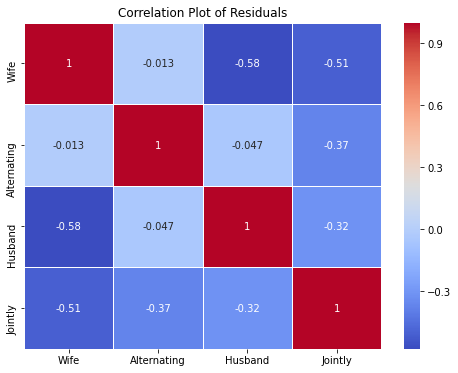

In [29]:
# Create a correlation plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Plot of Residuals")
plt.show()

In [31]:
# Perform SVD
U, Sigma, Vt = np.linalg.svd(residuals_df, full_matrices=False)

# Print U, Sigma, and Vt
print("U matrix:")
print(U)
print("\nSigma matrix (diagonal values):")
print(Sigma)
print("\nVt matrix (transposed):")
print(Vt)

U matrix:
[[-0.42762952 -0.23587902 -0.28228398  0.00711367]
 [-0.35197789 -0.21761257 -0.13633376  0.04813014]
 [-0.2339102  -0.11493572 -0.14480767  0.23007981]
 [-0.19557424 -0.19231779  0.17519699 -0.28850134]
 [-0.14136307  0.17221046 -0.06990952 -0.18825524]
 [-0.06528142  0.1686451   0.19063825 -0.37170876]
 [-0.04189568  0.15859251  0.14910925 -0.18405232]
 [ 0.07216535 -0.08919754  0.60778606 -0.21014741]
 [ 0.28421536 -0.2765295   0.43123528  0.54545117]
 [ 0.09354184  0.23576569  0.02484968 -0.21692283]
 [ 0.24793268  0.20050833 -0.22918636  0.31544717]
 [ 0.63820133 -0.39850534 -0.40738669 -0.39221863]
 [ 0.10379321  0.65156733 -0.11011902  0.10910385]]

Sigma matrix (diagonal values):
[3.07700977e+01 2.78582989e+01 1.48853105e+01 2.31326686e-15]

Vt matrix (transposed):
[[-0.66679846 -0.03220853  0.73643655  0.10956112]
 [-0.32112671 -0.1668171  -0.42174177  0.83137451]
 [-0.32896923  0.90856616 -0.24765256 -0.0703917 ]
 [-0.58654642 -0.38163098 -0.46740058 -0.54023865]]


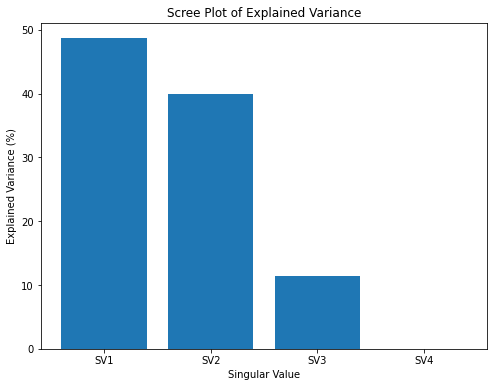

Explained Variance of Singular Values (%):
SV1: 48.69%
SV2: 39.91%
SV3: 11.40%
SV4: 0.00%


In [32]:
# Calculate explained variance
total_variance = np.sum(Sigma ** 2)
explained_variance = (Sigma ** 2) / total_variance * 100

# Scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, tick_label=[f'SV{i}' for i in range(1, len(explained_variance) + 1)])
plt.xlabel('Singular Value')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot of Explained Variance')
plt.show()

# Print explained variance values
print("Explained Variance of Singular Values (%):")
for i, variance in enumerate(explained_variance):
    print(f'SV{i + 1}: {variance:.2f}%')

## Show Row Plot ##

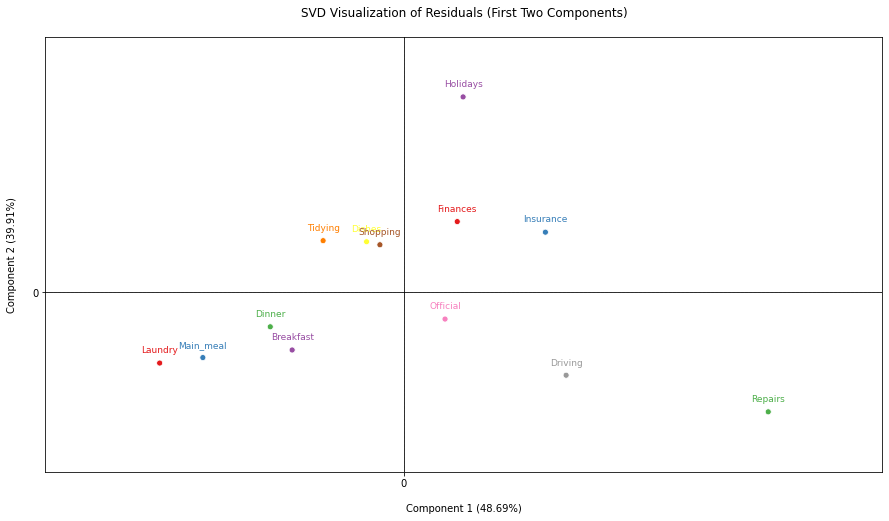

In [72]:
plt.figure(figsize=(15, 8))

# Create scatterplot
colors = sns.color_palette("Set1", len(U))
scatter = sns.scatterplot(x=U[:, 0], y=U[:, 1], palette="Set1",hue=colors)

# Set axis limits
x_padding = 0.2  # Adjust this value as needed
y_padding = 0.2  # Adjust this value as needed
plt.xlim(U[:, 0].min() - x_padding, U[:, 0].max() + x_padding)
plt.ylim(U[:, 1].min() - y_padding, U[:, 1].max() + y_padding)

# Calculate middle point
x_middle = 0
y_middle = 0

# Set ticks and labels
plt.xticks([x_middle])
plt.yticks([y_middle])

# Add grid
plt.grid(True, linestyle='--', alpha=0.4)

# Set labels and title
plt.xlabel(f'Component 1 ({explained_variance[0]:.2f}%)', labelpad=15)
plt.ylabel(f'Component 2 ({explained_variance[1]:.2f}%)', labelpad=15)
plt.title('SVD Visualization of Residuals (First Two Components)', pad=20)

for i, (x, y) in enumerate(zip(U[:, 0], U[:, 1])):
    plt.annotate(residuals_df.index[i], (x,y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color=colors[i])


# Draw axes passing through the center
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=0, color='black', linewidth=0.8)

# Remove the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

In [73]:
residuals_df.columns

Index(['Wife', 'Alternating', 'Husband', 'Jointly'], dtype='object')

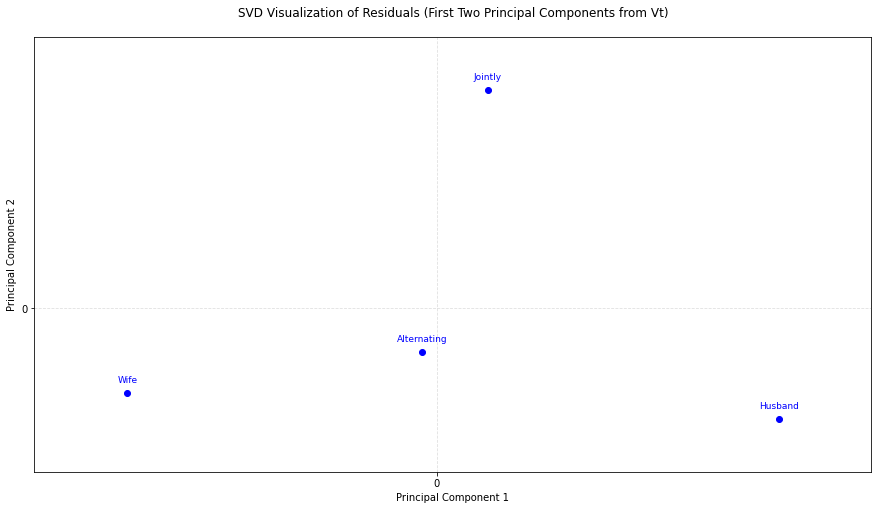

In [84]:
plt.figure(figsize=(15, 8))
plt.scatter(Vt[0, :], Vt[1, :], c='blue', marker='o')

# Set axis limits
x_padding = 0.2  # Adjust this value as needed
y_padding = 0.2  # Adjust this value as needed
plt.xlim(Vt[0, :].min() - x_padding, Vt[0, :].max() + x_padding)
plt.ylim(Vt[1, :].min() - y_padding, Vt[1, :].max() + y_padding)

# Calculate middle point
x_middle = 0
y_middle = 0

# Set ticks and labels
plt.xticks([x_middle])
plt.yticks([y_middle])

# Add grid
plt.grid(True, linestyle='--', alpha=0.4)

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVD Visualization of Residuals (First Two Principal Components from Vt)', pad=20)

# Annotate data based on columns of residuals_df
for i, (x, y) in enumerate(zip(Vt[0, :], Vt[1, :])):
    plt.annotate(residuals_df.columns[i], (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9, color='b')



# Show the plot
plt.show()

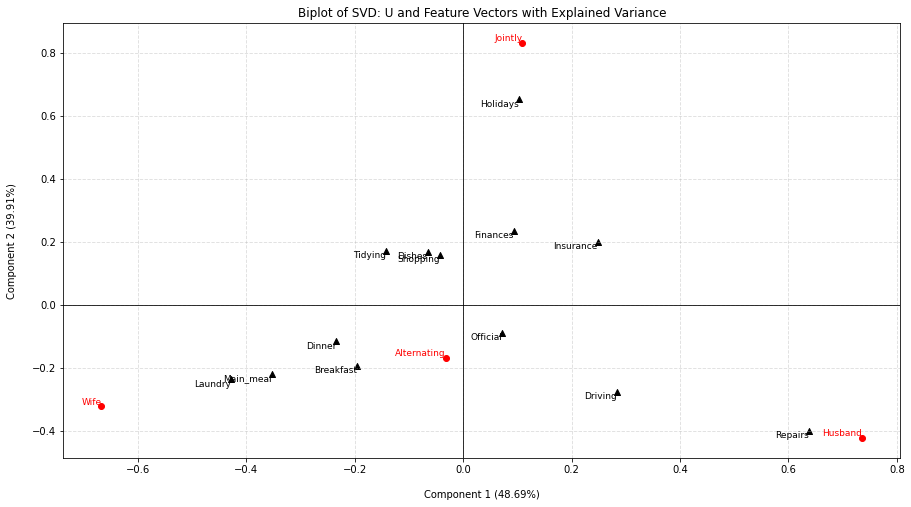

In [106]:
# Perform SVD
U, Sigma, Vt = np.linalg.svd(residuals_df, full_matrices=False)

# Calculate explained variance
explained_variance = (Sigma ** 2) / np.sum(Sigma ** 2) * 100

# Create a biplot with explained variance, feature names, and brand names
plt.figure(figsize=(15, 8))

# Plot data points for U
for i, (x, y) in enumerate(zip(U[:, 0], U[:, 1])):
    plt.scatter(x, y, color='black', marker='^')
    plt.text(x, y, f'{residuals_df.index[i]}', color='black', fontsize=9, ha='right', va='top')

# Plot vectors for Vt (features)
for i, (x, y) in enumerate(zip(Vt[0, :], Vt[1, :])):
    plt.scatter(x, y, color='r', marker='o')
    plt.text(x, y, f'{residuals_df.columns[i]}', color='r', fontsize=9, ha='right', va='bottom')


# Set labels and title
plt.xlabel(f'Component 1 ({explained_variance[0]:.2f}%)', labelpad=15)
plt.ylabel(f'Component 2 ({explained_variance[1]:.2f}%)', labelpad=15)
plt.title('Biplot of SVD: U and Feature Vectors with Explained Variance')

# Add grid
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.9)

# Draw axes passing through the center
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=0, color='black', linewidth=0.8)

# Show the plot
plt.show()